### Importa los datos
Dataset con diferentes fármacos, sus efectos y ratings de los clientes.

Importa el dataset *drugLibTrain_raw.tsv*

In [15]:
import pandas as pd
df_orig = pd.read_csv("data/drugLibTrain_raw.tsv", sep='\t')

### Descriptive Analysis

Quedate únicamente con las columnas que podamos manejar: Columnas numéricas y columnas categoricas con pocas categorias (menos de 10)

In [17]:
df = df_orig.copy()
df= df[['rating', 'effectiveness', 'sideEffects' ]]

In [4]:
df.head(20)

,rating,effectiveness,sideEffects
0,4,Highly Effective,Mild Side Effects
1,1,Highly Effective,Severe Side Effects
2,10,Highly Effective,No Side Effects
3,3,Marginally Effective,Mild Side Effects
4,2,Marginally Effective,Severe Side Effects
5,1,Ineffective,Severe Side Effects
6,9,Highly Effective,Mild Side Effects
7,10,Considerably Effective,No Side Effects
8,10,Highly Effective,No Side Effects
9,1,Ineffective,Extremely Severe Side Effects


In [5]:
df.shape

(3107, 3)

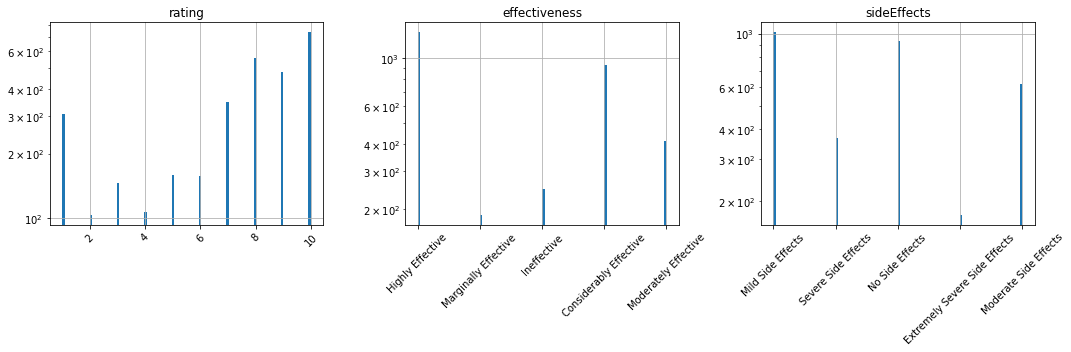

In [6]:
import matplotlib.pyplot as plt
#we can see in all variables except for years and stars that the frequency of 0 es huge
figure = plt.figure(figsize=(15,5))

for n, c in enumerate(df.columns):
  ax = figure.add_subplot(1,3,n+1)
  ax.set_title(c)
  ax.set_yscale("log") #the log scale help us to have a better idea of our data when the distribution is not fair
  df[c].hist(ax=ax, bins=100)
  plt.xticks(rotation=45)

figure.tight_layout() #this feature separate the graphs correctly
plt.show()

#### Transforma las columnas categoricas

Transforma las columnas categoricas a numericas mediante dummies

In [7]:
df = pd.get_dummies(df, columns = ['effectiveness', 'sideEffects'])

In [8]:
df

,rating,effectiveness_Considerably Effective,effectiveness_Highly Effective,effectiveness_Ineffective,effectiveness_Marginally Effective,effectiveness_Moderately Effective,sideEffects_Extremely Severe Side Effects,sideEffects_Mild Side Effects,sideEffects_Moderate Side Effects,sideEffects_No Side Effects,sideEffects_Severe Side Effects
0,4,0,1,0,0,0,0,1,0,0,0
1,1,0,1,0,0,0,0,0,0,0,1
2,10,0,1,0,0,0,0,0,0,1,0
3,3,0,0,0,1,0,0,1,0,0,0
4,2,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
3102,10,0,1,0,0,0,0,1,0,0,0
3103,1,0,0,1,0,0,1,0,0,0,0
3104,2,0,0,0,1,0,0,0,1,0,0
3105,8,1,0,0,0,0,0,1,0,0,0


#### Evalua cual es la mejor K

Utiliza silhouette_score para evaluar cual es la mejor K. Evalua como mucho K = 20

#### Genera el K Means 

In [9]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(df) for k in range(1, 20)]

In [10]:
# Desde k = 2
silhouette_scores = [silhouette_score(df, model.labels_) for model in kmeans_per_k[1:]]

#### Muestra en un grafico de lineas los distintos coeficientes de Silhouette

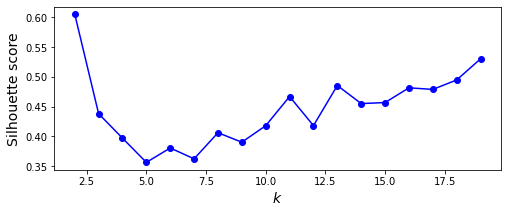

In [11]:
# k=2 parece que es el que más sentido tiene
plt.figure(figsize=(8, 3))
plt.plot(range(2, 20), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

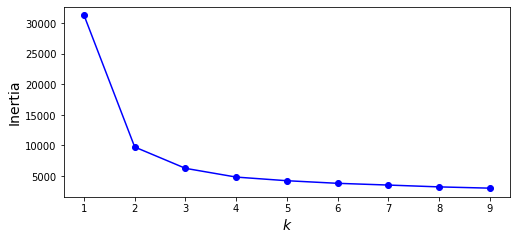

In [35]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(df)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14);

In [12]:
kmeans = KMeans(n_clusters=2, random_state=42).fit(df)

#### Muestra un scatter plot siendo el color de cada punto el cluster al que pertenece

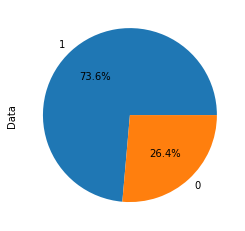

In [46]:
import pandas as pd
df = pd.DataFrame({'Data': kmeans.labels_})
df['Data'].value_counts().plot.pie(autopct="%.1f%%");

In [8]:
df.columns

Index(['rating', 'effectiveness_Considerably Effective',
       'effectiveness_Highly Effective', 'effectiveness_Ineffective',
       'effectiveness_Marginally Effective',
       'effectiveness_Moderately Effective',
       'sideEffects_Extremely Severe Side Effects',
       'sideEffects_Mild Side Effects', 'sideEffects_Moderate Side Effects',
       'sideEffects_No Side Effects', 'sideEffects_Severe Side Effects'],
      dtype='object')

In [58]:
df_orig.effectiveness.unique()

effectiveness_str = ['Highly Effective', 'Considerably Effective', 'Moderately Effective', 'Marginally Effective', 'Ineffective']

def ord_end(ls_cat):
    n = len(ls_cat)
    rng = list(range(n-1, -1, -1))

    eff_tup = list(zip(ls_cat, rng))
    eff_map = dict(eff_tup)
    return eff_map

eff_map = ord_end(effectiveness_str)
eff_map

{'Highly Effective': 4,
 'Considerably Effective': 3,
 'Moderately Effective': 2,
 'Marginally Effective': 1,
 'Ineffective': 0}

In [49]:
df_orig.columns

Index(['Unnamed: 0', 'urlDrugName', 'rating', 'effectiveness', 'sideEffects',
       'condition', 'benefitsReview', 'sideEffectsReview', 'commentsReview'],
      dtype='object')

In [50]:
df_eff = df_orig.copy()
df_eff['effectiveness_int'] = df_eff['effectiveness'].map(eff_map)

<AxesSubplot:>

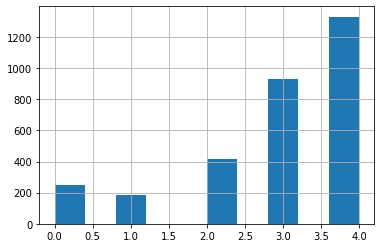

In [51]:
df_eff['effectiveness_int'].hist()

In [56]:
df_orig['sideEffects'].unique()

array(['Mild Side Effects', 'Severe Side Effects', 'No Side Effects',
       'Extremely Severe Side Effects', 'Moderate Side Effects'],
      dtype=object)

In [59]:
ls_effects = ['Extremely Severe Side Effects', 'Severe Side Effects', 'Moderate Side Effects', 'Mild Side Effects', 'No Side Effects']

side_eff_map = ord_end(ls_effects)

side_eff_map

{'Extremely Severe Side Effects': 4,
 'Severe Side Effects': 3,
 'Moderate Side Effects': 2,
 'Mild Side Effects': 1,
 'No Side Effects': 0}

<AxesSubplot:>

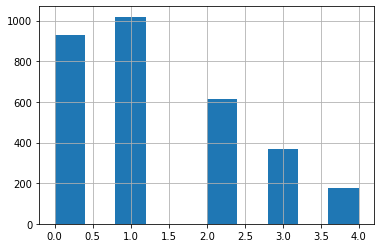

In [60]:
df_eff['sideEffects_int'] = df_eff['sideEffects'].map(side_eff_map)

df_eff['sideEffects_int'].hist()

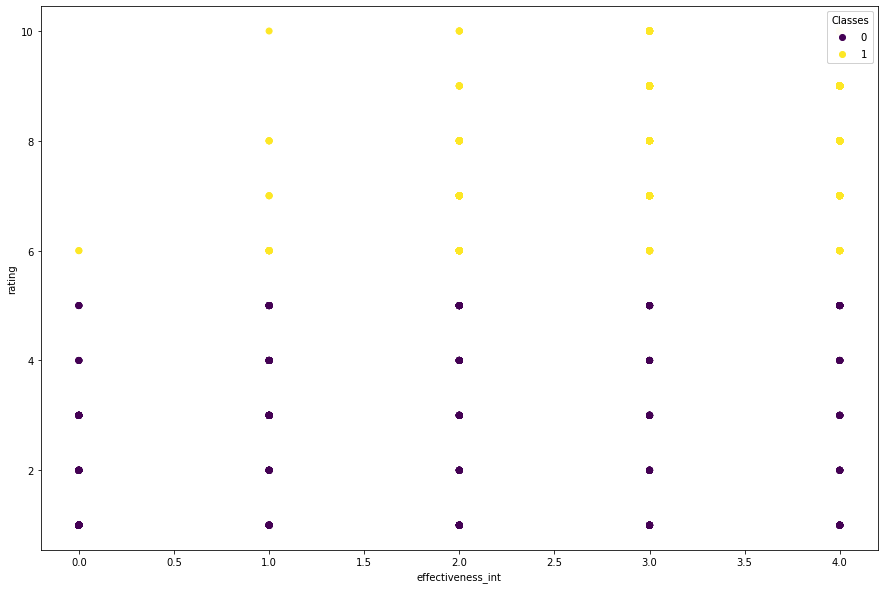

In [54]:
fig, ax = plt.subplots(figsize=(15,10))

scatter = ax.scatter(df_eff['effectiveness_int'], df_eff.rating, c=kmeans.labels_)
plt.xlabel('effectiveness_int')
plt.ylabel('rating')
# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Classes")

ax.add_artist(legend1)

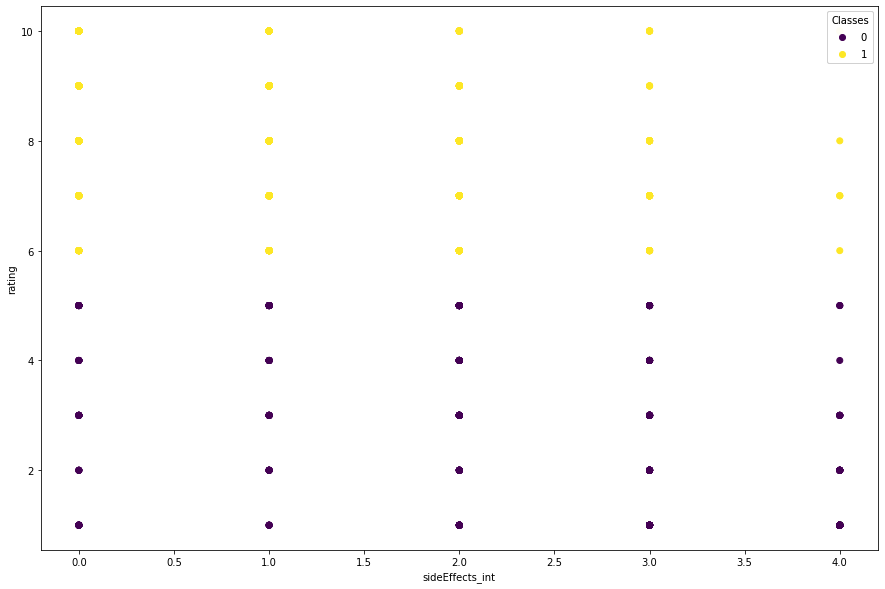

In [61]:
fig, ax = plt.subplots(figsize=(15,10))

scatter = ax.scatter(df_eff['sideEffects_int'], df_eff.rating, c=kmeans.labels_)
plt.xlabel('sideEffects_int')
plt.ylabel('rating')
# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Classes")

ax.add_artist(legend1)

In [62]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df_eff, x='effectiveness_int', y='sideEffects_int', z='rating',
              color=kmeans.labels_)
fig.show()